In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [3]:
df= pd.read_csv(r"C:\Users\Mohamed\Downloads\Ecommerce_Customers.csv")

In [4]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.duplicated().sum()

0

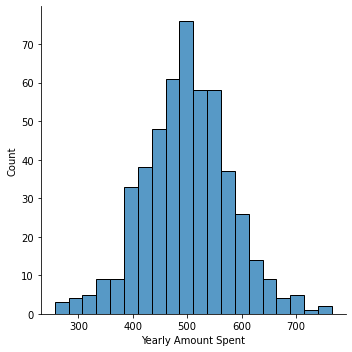

In [11]:
sns.displot(data=df, x="Yearly Amount Spent")

In [12]:
df["Avatar"].value_counts()

Cyan              7
CadetBlue         7
Teal              7
GreenYellow       7
SlateBlue         7
                 ..
PaleGoldenRod     1
PaleTurquoise     1
PapayaWhip        1
LightSlateGray    1
PowderBlue        1
Name: Avatar, Length: 138, dtype: int64

In [14]:
from datasist.structdata import detect_outliers

In [16]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [17]:
idx_out = detect_outliers(df , 0 ,["Avg. Session Length","Time on App","Time on Website","Length of Membership"] )
idx_out

[12,
 154,
 390,
 65,
 309,
 362,
 442,
 69,
 157,
 50,
 151,
 153,
 161,
 173,
 225,
 303,
 379,
 396,
 434,
 447]

In [21]:
df.drop(idx_out , axis = 0 , inplace=True)


KeyError: '[ 12 154 390  65 309 362 442  69 157  50 151 153 161 173 225 303 379 396\n 434 447] not found in axis'

In [22]:
df.drop(columns=['Email', 'Address', 'Avatar'],inplace= True, axis=1)

In [23]:
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x = df.drop("Yearly Amount Spent" , axis = 1)
y = df["Yearly Amount Spent"]

In [30]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=7)

## Scalling

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

In [41]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [42]:
colums_to_be_scaled = ["Avg. Session Length","Time on App","Time on Website","Length of Membership" ]

In [43]:
x_train[colums_to_be_scaled] = scaler.fit_transform(x_train[colums_to_be_scaled])
x_test[colums_to_be_scaled] = scaler.transform(x_test[colums_to_be_scaled])

<ipython-input-43-1feceac17107>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[colums_to_be_scaled] = scaler.fit_transform(x_train[colums_to_be_scaled])
C:\Users\Mohamed\anaconda3\lib\site-packages\pandas\core\frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\Mohamed\anaconda3\lib\site-packages\pandas\core\frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [44]:
x_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
136,-0.391103,0.183198,-0.477807,0.384053
3,1.327932,1.780187,-0.351935,-0.462336
462,0.476872,-0.860550,0.133887,-1.333444
61,0.023316,-2.589187,-0.577347,1.673994
339,-0.060624,0.580769,0.253974,-0.806763
...,...,...,...,...
221,0.617855,-0.857264,0.593922,1.863002
71,1.360137,0.197743,-0.911366,1.252522
26,0.516594,0.787694,-0.640167,1.202276
206,-0.806028,-1.075348,1.167104,-0.476182


In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [46]:
y_pred = model.predict(x_test)

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
mean_squared_error(y_test , y_pred , squared=False)

10.696839593995794

In [49]:
model.score(x_test , y_test)

0.9776715418504924

In [50]:
from sklearn.metrics import r2_score

In [51]:
r2_score(y_test , y_pred)

0.9776715418504924